In [ ]:
!pip install qiskit
!pip install qiskit_machine_learning
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

In [ ]:
sm = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
sm = sm.dropna()
sm.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
sm1 = sm.copy()                                     # Create copy of pandas DataFrame
sm1['Gender'] = sm1['Gender'].map({'Male': True, 'Female': False})      # Replace string by boolean
print(sm1)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member   False   
1    226-31-3081      C  Naypyitaw        Normal   False   
2    631-41-3108      A     Yangon        Normal    True   
3    123-19-1176      A     Yangon        Member    True   
4    373-73-7910      A     Yangon        Normal    True   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    True   
996  303-96-2227      B   Mandalay        Normal   False   
997  727-02-1313      A     Yangon        Member    True   
998  347-56-2442      A     Yangon        Normal    True   
999  849-09-3807      A     Yangon        Member   False   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sm1[["Unit price","Quantity","Total","cogs","gross margin percentage","gross income","Rating"]] = scaler.fit_transform(sm1[["Unit price","Quantity","Total","cogs","gross margin percentage","gross income","Rating"]])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = sm1[["Unit price","Quantity","Total","cogs","gross margin percentage","gross income","Rating"]].values
y = sm1["Gender"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

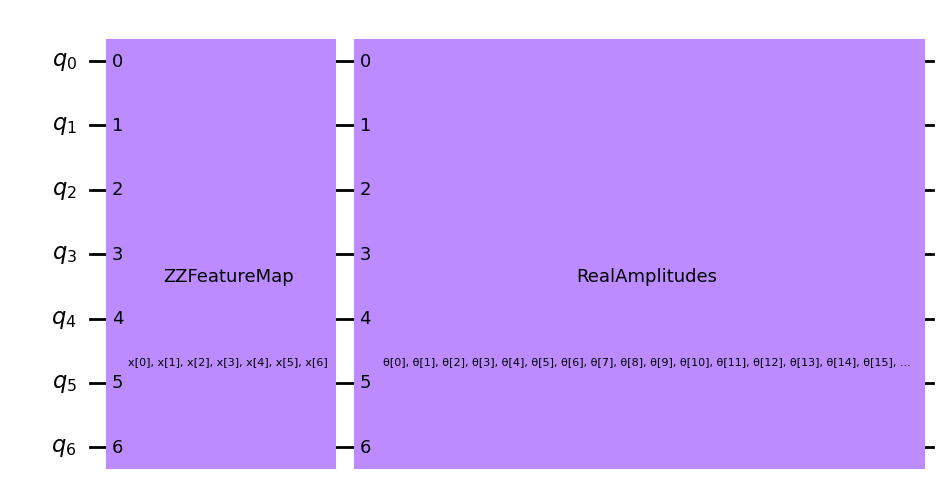

In [ ]:
from pylatexenc import *
# construct QNN
qc = QuantumCircuit(7)
feature_map = ZZFeatureMap(7)
ansatz = RealAmplitudes(7)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")

In [ ]:
estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

In [ ]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=100), callback=callback_graph
)

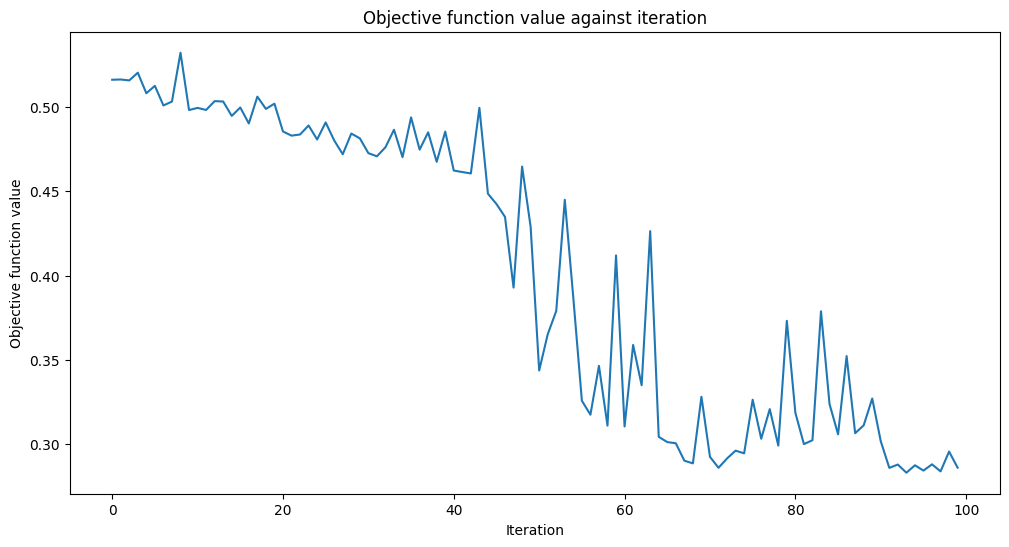

0.499

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
estimator_classifier.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
estimator_classifier.score(X, y)

In [ ]:
#score=estimator_classifier.score(X, y)
#print(f"accuracy score: ",score)
# score classifier
print(f"Accuracy from the train data : {np.round(100 * estimator_classifier.score(X, y), 2)}%")

In [ ]:
# Generate predictions on the test dataset

test_predictions = estimator_classifier.predict(X_train)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, test_predictions, average='weighted')
recall = recall_score(y_train, test_predictions, average='weighted')
f1 = f1_score(y_train, test_predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.2562890625
Recall: 0.50625
F1-score: 0.34030082987551863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#end of code

In [ ]:
!pip install qiskit
!pip install qiskit_machine_learning
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

In [ ]:

sm =  pd.read_csv('/content/Breast_cancer_data.csv')

sm = sm.dropna()
sm.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sm[["mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness"]] = scaler.fit_transform(sm[["mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness"]])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = sm[["mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness"]].values
y = sm["diagnosis"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

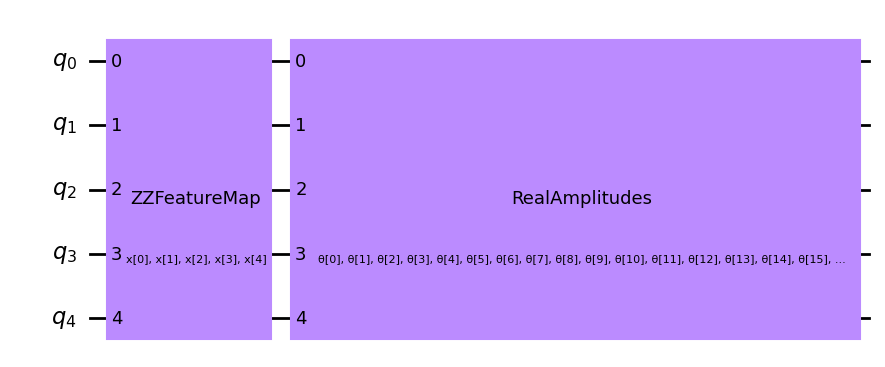

In [ ]:
from pylatexenc import *
# construct QNN
qc = QuantumCircuit(5)
feature_map = ZZFeatureMap(5)
ansatz = RealAmplitudes(5)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")

In [ ]:
estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

In [ ]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=100), callback=callback_graph
)

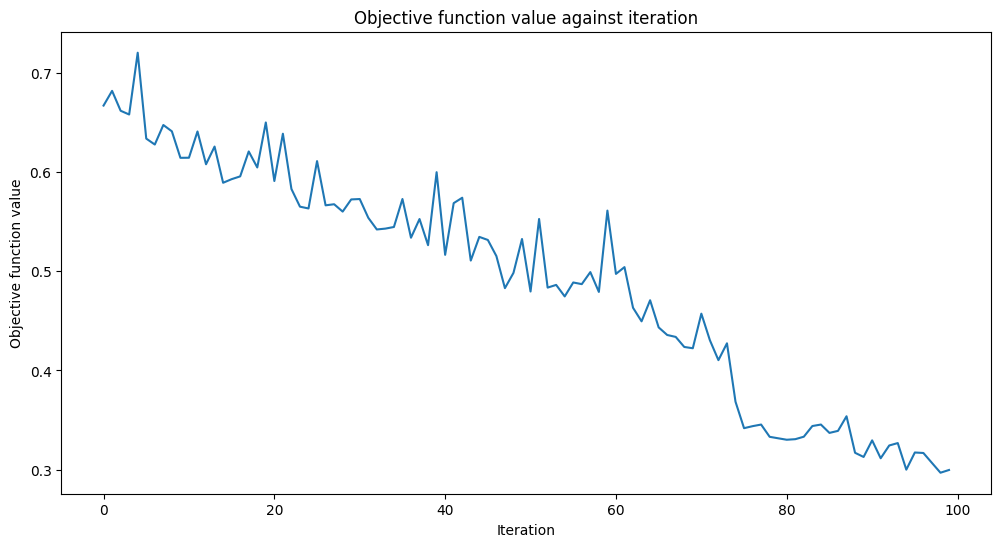

0.6221441124780316

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
estimator_classifier.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
estimator_classifier.score(X, y)

In [ ]:
#score=estimator_classifier.score(X, y)
#print(f"accuracy score: ",score)
# score classifier
print(f"Accuracy from the train data : {np.round(100 * estimator_classifier.score(X, y), 2)}%")

In [ ]:
# Generate predictions on the test dataset

test_predictions = estimator_classifier.predict(X_train)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, test_predictions, average='weighted')
recall = recall_score(y_train, test_predictions, average='weighted')
f1 = f1_score(y_train, test_predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.3544509182093075
Recall: 0.5868131868131868
F1-score: 0.4419513540852452


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#end of code